In [ ]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Installing required libraries

# Data processing
!pip install pandas
!pip install demoji

# Language detection
!pip install langid

     |████████████████████████████████| 1.9MB 4.0MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp37-none-any.whl size=1941191 sha256=7413a1c2c80f7cf1552301adbbee1e762ee634473287a6741f68a98ca8f8b0cf
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [ ]:
# Import required libraries

#Data processing packages
import pandas as pd
import numpy as np
import scipy
import os
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import demoji
import json

#Language detection pacckages
import langid

#NLP packages
from textblob import TextBlob

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download required data for data processing
nltk.download("stopwords")
nltk.download("punkt")
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
... OK (Got response in 0.16 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [ ]:
# Working directory path
work_path = '/content/drive/MyDrive/YTint/'

In [ ]:
#Importing YouTube comments data
filename = 'UScomments1.csv'
col_list = ["video_id", "comment_text"]
df = pd.read_csv(work_path + filename, usecols=col_list, encoding='utf-8', error_bad_lines=False)

In [1]:
df

NameError: ignored

In [ ]:
#Remove Duplicate Data

#making a bool series
bool_series = df["comment_text"].duplicated(keep = False)

# passing NOT of bool series to see unique values only
df = df[~bool_series]

# displaying data
df

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN . attendance
4,XpVt6Z1Gjjo,trending 😉
...,...,...
691345,EoejGgUNmVU,Thank so much for you song grant
691346,EoejGgUNmVU,Lost on you ! 😍\nOH My God I love this song !😭
691353,EoejGgUNmVU,I LOVE LP❤️
691379,EoejGgUNmVU,*L O S T O N Y O U*


In [ ]:
# Data Preprocessing/Cleaning

#Remove emojis
df['comment_text'] = df['comment_text'].apply(lambda x: demoji.replace(str(x),""))
df

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN . attendance
4,XpVt6Z1Gjjo,trending
...,...,...
691345,EoejGgUNmVU,Thank so much for you song grant
691346,EoejGgUNmVU,Lost on you ! \nOH My God I love this song !
691353,EoejGgUNmVU,I LOVE LP
691379,EoejGgUNmVU,*L O S T O N Y O U*


In [ ]:
# URL Removal
regex = r'http\S+'
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(regex,"",str(x)))
df

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN . attendance
4,XpVt6Z1Gjjo,trending
...,...,...
691345,EoejGgUNmVU,Thank so much for you song grant
691346,EoejGgUNmVU,Lost on you ! \nOH My God I love this song !
691353,EoejGgUNmVU,I LOVE LP
691379,EoejGgUNmVU,*L O S T O N Y O U*


In [ ]:
# Dataframe cleaning (Cont.)

# RE for special character
regex0 = '[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]+'

# RE for extra whitespaces and next line
regex1 = '\s+|\n+|\r+'

# RE for apostrophes
regex2 = "'+"

df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(regex0,"",x))
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(regex1," ",x))
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(regex2,"'",x))
df['comment_text'] = df['comment_text'].apply(lambda x: x.replace("'s", " is"))

def remove_if_only_num(line):
  temp = line.replace(" ", "")
  if temp.isdecimal(): 
    line = line.replace(line,"")
  return line

df['comment_text'] = df['comment_text'].apply(lambda x: remove_if_only_num(str(x)))
df['comment_text'] = df['comment_text'].apply(lambda x: x.strip())

df

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it is yo big day
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN attendance
4,XpVt6Z1Gjjo,trending
...,...,...
691345,EoejGgUNmVU,Thank so much for you song grant
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song
691353,EoejGgUNmVU,I LOVE LP
691379,EoejGgUNmVU,L O S T O N Y O U


In [ ]:
#Remove Duplicate Data

#making a bool series
bool_series = df["comment_text"].duplicated(keep = False)

# passing NOT of bool series to see unique values only
df = df[~bool_series]

# displaying data
df

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it is yo big day
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN attendance
5,XpVt6Z1Gjjo,1 on trending AYYEEEEE
...,...,...
691345,EoejGgUNmVU,Thank so much for you song grant
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song
691353,EoejGgUNmVU,I LOVE LP
691379,EoejGgUNmVU,L O S T O N Y O U


In [ ]:
# Remove Non-Englisg comments

df['lang'] = 0

# Adding language feature to dataframe (i.e. specify language of comment)
def detect_en_lang(line):

  line = langid.classify(line)

  if str(line).find("en") > -1:
    return "en"
  else:
    return "error"

df['lang'] = df['comment_text'].apply(lambda x: detect_en_lang(str(x)))

In [ ]:
# Number of English comments
df[df['lang']=='en']['lang'].value_counts()

en    262167
Name: lang, dtype: int64

In [ ]:
# Saving ONLY english comments in dataframe
df = df[df['lang'] == 'en']
df

,video_id,comment_text,lang
0,XpVt6Z1Gjjo,Logan Paul it is yo big day,en
1,XpVt6Z1Gjjo,I've been following you from the start of your...,en
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,en
5,XpVt6Z1Gjjo,1 on trending AYYEEEEE,en
7,XpVt6Z1Gjjo,1 trending,en
...,...,...,...
691189,qRoVlH1OcI4,When you take a knee you don’t get elected,en
691320,EoejGgUNmVU,u are an angel,en
691345,EoejGgUNmVU,Thank so much for you song grant,en
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song,en


In [ ]:
# Correcting contractions

with open('/content/drive/MyDrive/YTint/ContractionMap.json','r') as file: Abbr_dict = json.loads(file.read())

def correct_cont(line):
  t = ' '
  splitLine = line.split()
  
  for i in line.split() :
    if i in Abbr_dict :
      splitLine[splitLine.index(i)] = Abbr_dict[i]
      ' '.join(splitLine)
  
  return t.join(splitLine)

df['comment_text'] = df['comment_text'].apply(lambda x: correct_cont(str(x)))
df

,video_id,comment_text,lang
0,XpVt6Z1Gjjo,Logan Paul it is yo big day,en
1,XpVt6Z1Gjjo,I have been following you from the start of yo...,en
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,en
5,XpVt6Z1Gjjo,1 on trending AYYEEEEE,en
7,XpVt6Z1Gjjo,1 trending,en
...,...,...,...
691189,qRoVlH1OcI4,When you take a knee you don’t get elected,en
691320,EoejGgUNmVU,u are an angel,en
691345,EoejGgUNmVU,Thank so much for you song grant,en
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song,en


In [ ]:
#Scraping for slang words

from bs4 import BeautifulSoup
import urllib3
import json
http=urllib3.PoolManager()
Abbr_dict={}
#Function to get the Slangs from https://www.noslang.com/dictionary/
def getAbbr(alpha):
    global Abbr_dict
    r=http.request('GET','https://www.noslang.com/dictionary/'+alpha)
    soup=BeautifulSoup(r.data,'html.parser')
    
    for i in soup.findAll('div',{'class':'dictionary-word'}): 

        abbr=i.find('abbr')['title']
        Abbr_dict[i.find('span').text[:-2]]=abbr
linkDict=[]
#Generating a-z
for one in range(97,123):
    linkDict.append(chr(one))
#Creating Links for https://www.noslang.com/dictionary/a...https://www.noslang.com/dictionary/b....etc
for i in linkDict:
    getAbbr(i)
# finally writing into a json file
with open('/content/drive/MyDrive/YTint/ShortendText.json','w') as file:
    jsonDict=json.dump(Abbr_dict,file)

In [ ]:
#Converting slangs/abbrevations to full form in dataframe

with open('/content/drive/MyDrive/YTint/ShortendText.json','r') as file:
    Abbr_dict = json.loads(file.read())

def clean_slangs(line):
  t=' '
  splitLine=line.split()
  for i in line.split():
    if i in Abbr_dict :
        splitLine[splitLine.index(i)]=Abbr_dict[i]
        ' '.join(splitLine)
  
  return t.join(splitLine)

df['comment_text']=df['comment_text'].apply(lambda x: clean_slangs(str(x)))

In [ ]:
#Remove Duplicate Data

#making a bool series
bool_series = df["comment_text"].duplicated(keep = False)

# passing NOT of bool series to see unique values only
df = df[~bool_series]

# displaying data
df

,video_id,comment_text,lang
0,XpVt6Z1Gjjo,Logan Paul it is year old big day,en
1,XpVt6Z1Gjjo,I have been following you from the start of yo...,en
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,en
5,XpVt6Z1Gjjo,1 on trending AYYEEEEE,en
7,XpVt6Z1Gjjo,1 trending,en
...,...,...,...
691152,xlu6i6lT_vk,present maybe everything surprisingly dose ter...,en
691189,qRoVlH1OcI4,When you take a knee you don’t get elected,en
691345,EoejGgUNmVU,Thank so much for you song grant,en
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song,en


In [ ]:
#Removing Empty Comments

def remove_comments(df):
  # Checks for comments which has zero length in a dataframe
  zero_length_comments = df[df["comment_text"].map(len) == 0]

  # taking all the indexes of the filtered comments in a list
  zero_length_comments_index = [ind for ind in zero_length_comments.index]

  # removing those rows from dataframe whose indexes matches 
  df.drop(zero_length_comments_index, inplace = True)

  return df

df = remove_comments(df)
df

,video_id,comment_text,lang
0,XpVt6Z1Gjjo,Logan Paul it is year old big day,en
1,XpVt6Z1Gjjo,I have been following you from the start of yo...,en
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,en
5,XpVt6Z1Gjjo,1 on trending AYYEEEEE,en
7,XpVt6Z1Gjjo,1 trending,en
...,...,...,...
691152,xlu6i6lT_vk,present maybe everything surprisingly dose ter...,en
691189,qRoVlH1OcI4,When you take a knee you don’t get elected,en
691345,EoejGgUNmVU,Thank so much for you song grant,en
691346,EoejGgUNmVU,Lost on you \nOH My God I love this song,en


In [ ]:
#Convert comments to lower case
df['comment_text'] = df['comment_text'].str.lower()

In [ ]:
# Display Stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Remove stopwords from dataframe

#Set stop words
stop_words = set(stopwords.words('english'))

#Remove stopwords func
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

df['comment_text'] = df['comment_text'].str.strip()

df['comment_text'] = df['comment_text'].apply(lambda x : remove_stopwords(str(x)))

In [ ]:
#Calculating  Sentiment Polarity

polarity=[] # list which will contain the polarity of the comments
for i in df.comment_text.values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
    except:
        polarity.append(0)
        
#Adding the Sentiment Polarity column to dataframe
df['polarity']=polarity

In [ ]:
df['pol_cat'] = 0
#Converting the polarity values from continuous to categorical
df['pol_cat'][df.polarity == 0]= 0
df['pol_cat'][df.polarity > 0]= 1
df['pol_cat'][df.polarity < 0]= -1

#Categorical values
df['pol_cat'].value_counts()

 1    110410
 0    107126
-1     44461
Name: pol_cat, dtype: int64

In [ ]:
#Shuffle Data
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Save dataframe to csv

# csv name
filename = 'MLdata'
df.to_csv(work_path + filename + '.csv', index = False)

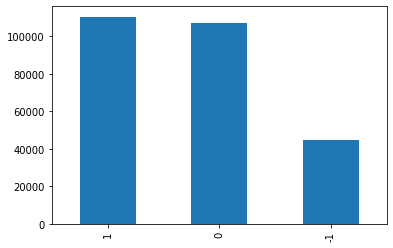

In [ ]:
#Plot bar chart comment text
df.pol_cat.value_counts().plot.bar()

In [ ]:
df

,video_id,comment_text,lang,polarity,pol_cat
0,BVKnt7H4zVc,hi zack would like see durability test samsung...,en,0.000000,0
1,n54-eEvoMpg,although agree sentiment message leaves severa...,en,0.049306,1
2,A8QQBRIqZmw,looks like sjw bullshit okay,en,0.500000,1
3,3d9i_0Ty7Cg,might simulated order charge battery sort spac...,en,0.000000,0
4,xo2B67vz4HA,set green screen,en,-0.200000,-1
...,...,...,...,...,...
261992,YYwB63YslbA,james kent looks like one thumb thumbs spy kids,en,0.000000,0
261993,3d9i_0Ty7Cg,short answer doesnt matter,en,0.000000,0
261994,RJuqdTXhDX4,awill people buy iphone x\nbare madpeople buy\...,en,-0.800000,-1
261995,2YGrrsKs-Xg,close eyes sounds exactly 20 years ago legenddd,en,0.250000,1


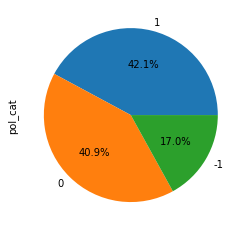

In [ ]:
df.pol_cat.value_counts().plot.pie(autopct='%1.1f%%')

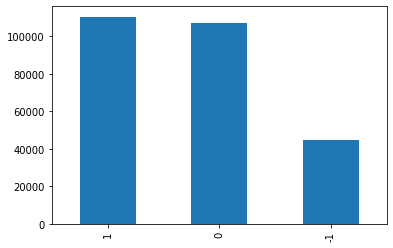

In [ ]:
df.pol_cat.value_counts().plot.bar()